# Give me some Credit

**Variables**

**SeriousDlqin2yrs:** Person experienced 90 days past due delinquency or worse

**RevolvingUtilizationOfUnsecuredLines:** Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits

**age:** Age of borrower in years

**NumberOfTime30-59DaysPastDueNotWorse:** Number of times borrower has been 30-59 days past due but no worse in the last 2 years.

**DebtRatio:** Monthly debt payments, alimony,living costs divided by monthy gross income

**MonthlyIncome:** Monthly income

**NumberOfOpenCreditLinesAndLoans:** Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)

**NumberOfTimes90DaysLate:** Number of times borrower has been 90 days or more past due.

**NumberRealEstateLoansOrLines:** Number of mortgage and real estate loans including home equity lines of credit

**NumberOfTime60-89DaysPastDueNotWorse:** Number of times borrower has been 60-89 days past due but no worse in the last 2 years.

**NumberOfDependents:** Number of dependents in family excluding themselves (spouse, children etc.)

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
credit_df = pd.read_csv("data/cs-training.csv")
credit_test_df = pd.read_csv("data/cs-test.csv")

In [7]:
credit_test_df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


## Data Exploration

In [8]:
# drop the row id column 
credit_df =credit_df.drop(credit_df.columns[0],axis=1)
credit_test_df =credit_test_df.drop(credit_test_df.columns[0],axis=1)

In [9]:
credit_df.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [10]:
credit_df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [11]:
credit_test_df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,0.0,101503.000000,101503.000000,101503.000000,101503.000000,8.140000e+04,101503.000000,101503.000000,101503.000000,101503.000000,98877.000000
mean,NaN,5.310000,52.405436,0.453770,344.475020,6.855036e+03,8.453514,0.296691,1.013074,0.270317,0.769046
std,NaN,196.156039,14.779756,4.538487,1632.595231,3.650860e+04,5.144100,4.515859,1.110253,4.503578,1.136778
min,NaN,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,0.030131,41.000000,0.000000,0.173423,3.408000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,0.152586,52.000000,0.000000,0.364260,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,NaN,0.564225,63.000000,0.000000,0.851619,8.200000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,NaN,21821.000000,104.000000,98.000000,268326.000000,7.727000e+06,85.000000,98.000000,37.000000,98.000000,43.000000


### NumberOfTime60-89DaysPastDueNotWorse, NumberOfTime30-59DaysPastDueNotWorse, NumberOfTimes90DaysLate : sustituir Outliers por la media

In [12]:
#outliers>89
credit_df['NumberOfTime60-89DaysPastDueNotWorse'].value_counts()

0     142396
1       5731
2       1118
3        318
98       264
4        105
5         34
6         16
7          9
96         5
8          2
11         1
9          1
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: int64

In [13]:
credit_df['NumberOfTime30-59DaysPastDueNotWorse'].value_counts()

0     126018
1      16033
2       4598
3       1754
4        747
5        342
98       264
6        140
7         54
8         25
9         12
96         5
10         4
12         2
13         1
11         1
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: int64

In [14]:
credit_df['NumberOfTimes90DaysLate'].value_counts()

0     141662
1       5243
2       1555
3        667
4        291
98       264
5        131
6         80
7         38
8         21
9         19
10         8
11         5
96         5
13         4
12         2
14         2
15         2
17         1
Name: NumberOfTimes90DaysLate, dtype: int64

In [15]:
#sustituimos estos valores por la media
Media = []
med = credit_df['NumberOfTime60-89DaysPastDueNotWorse'].median()
for val in credit_df['NumberOfTime60-89DaysPastDueNotWorse']:
    if ((val == 98) | (val == 96)):
        Media.append(med)
    else:
        Media.append(val)

credit_df['NumberOfTime60-89DaysPastDueNotWorse'] = Media

In [16]:
#sustituimos estos valores por la media
Media = []
med = credit_df['NumberOfTime30-59DaysPastDueNotWorse'].median()
for val in credit_df['NumberOfTime30-59DaysPastDueNotWorse']:
    if ((val == 98) | (val == 96)):
        Media.append(med)
    else:
        Media.append(val)

credit_df['NumberOfTime30-59DaysPastDueNotWorse'] = Media

In [17]:
#sustituimos estos valores por la media
Media = []
med = credit_df['NumberOfTimes90DaysLate'].median()
for val in credit_df['NumberOfTimes90DaysLate']:
    if ((val == 98) | (val == 96)):
        Media.append(med)
    else:
        Media.append(val)

credit_df['NumberOfTimes90DaysLate'] = Media

### MonthlyIncome, NumberOfDependents: sustituir NAs por la media

In [18]:
credit_df["MonthlyIncome"].fillna(credit_df["MonthlyIncome"].median(), inplace=True)
credit_df["NumberOfDependents"].fillna(credit_df["NumberOfDependents"].median(), inplace=True)

In [19]:
credit_df["MonthlyIncome"].fillna(credit_df["MonthlyIncome"].median(), inplace=True)
credit_df["NumberOfDependents"].fillna(credit_df["NumberOfDependents"].median(), inplace=True)

### RevolvingUtilizationOfUnsecuredLines: eliminar Outliers

In [20]:
#desviación tipica muy alta
credit_df['RevolvingUtilizationOfUnsecuredLines'].max()

50708.0

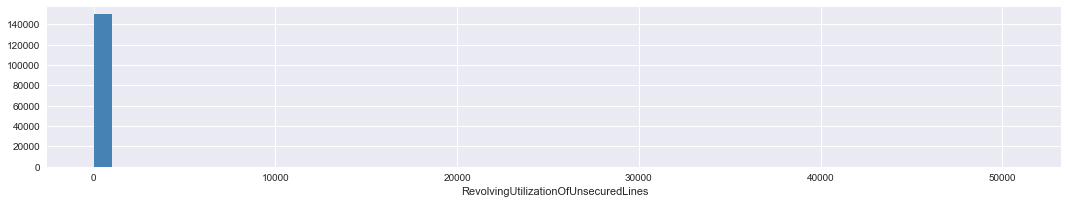

In [21]:
sns.set(style="darkgrid")
g = sns.FacetGrid(credit_df, margin_titles=True,aspect=5)
g.map(plt.hist, "RevolvingUtilizationOfUnsecuredLines", color="steelblue", bins=50, lw=0)
plt.show()

In [22]:
#porcentaje, por lo tanto los valores deben estar entre 0-1
credit_df['RevolvingUtilizationOfUnsecuredLines'][credit_df['RevolvingUtilizationOfUnsecuredLines']>1].count()

3321

In [23]:
Revol= []
for val in credit_df['RevolvingUtilizationOfUnsecuredLines']:
    if val <= 1:
        Revol.append(val)
    else:
        Revol.append(1)
credit_df['RevolvingUtilizationOfUnsecuredLines']=Revol

### age: eliminamos un outlier en 0

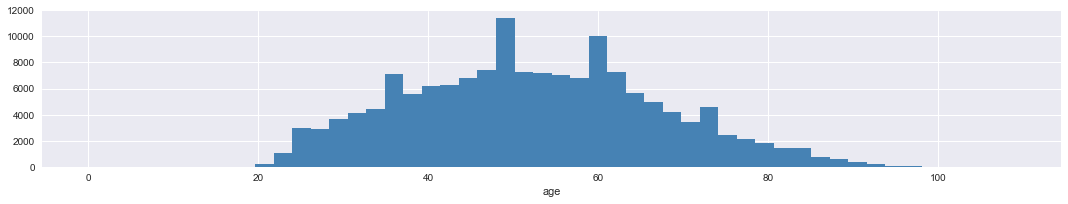

In [24]:
sns.set(style="darkgrid")
g = sns.FacetGrid(credit_df, margin_titles=True,aspect=5)
g.map(plt.hist, "age", color="steelblue", bins=50, lw=0)
plt.show()

In [25]:
credit_df['age'][credit_df['age']<20]

65695    0
Name: age, dtype: int64

In [26]:
age= []
for val in credit_df['age']:
    if val <20:
        age.append(val)
    else:
        age.append(20)
credit_df['RevolvingUtilizationOfUnsecuredLines']=age

### DebtRatio

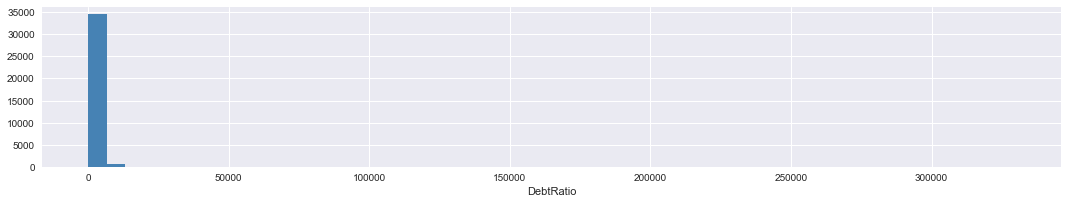

In [27]:
sns.set(style="darkgrid")
g = sns.FacetGrid(credit_df[credit_df["DebtRatio"]>1], margin_titles=True,aspect=5)
g.map(plt.hist, "DebtRatio", color="steelblue", bins=50, lw=0)
plt.show()

### NumberOfOpenCreditLinesAndLoans

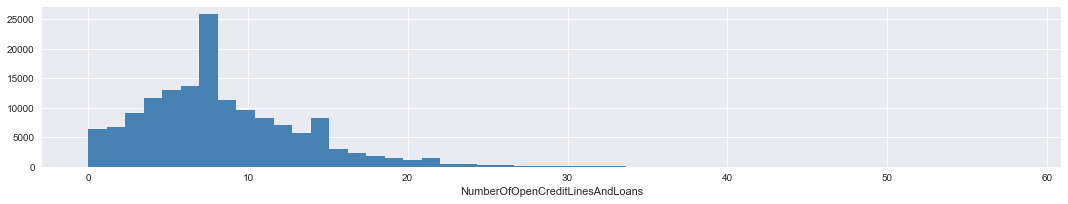

In [28]:
sns.set(style="darkgrid")
g = sns.FacetGrid(credit_df, margin_titles=True,aspect=5)
g.map(plt.hist, "NumberOfOpenCreditLinesAndLoans", color="steelblue", bins=50, lw=0)
plt.show()

### NumberRealEstateLoansOrLines

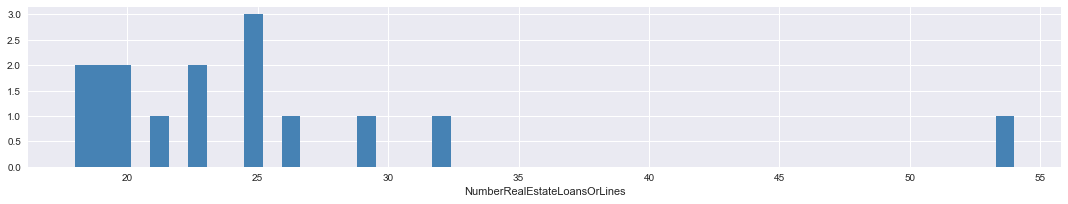

In [29]:
sns.set(style="darkgrid")
g = sns.FacetGrid(credit_df[credit_df["NumberRealEstateLoansOrLines"]>17], margin_titles=True,aspect=5)
g.map(plt.hist, "NumberRealEstateLoansOrLines", color="steelblue", bins=50, lw=0)
plt.show()

### Cómo de desbalanceada está la variable de salida: SeriousDlqin2yrs

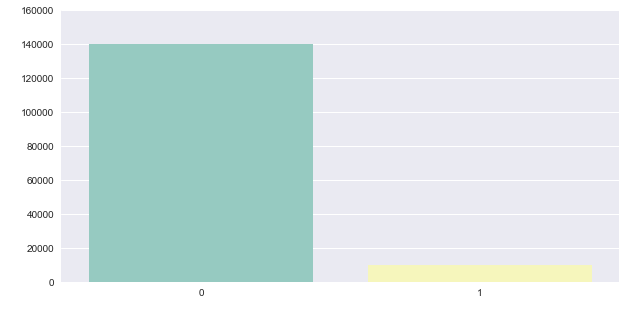

In [30]:
ax = sns.countplot(x = credit_df.SeriousDlqin2yrs ,palette="Set3")
sns.set(font_scale=1.5)
ax.set_ylim(top = 150000)
ax.set_xlabel(' ')
ax.set_ylabel(' ')
fig = plt.gcf()
fig.set_size_inches(10,5)
ax.set_ylim(top=160000)

plt.show()

## Dividimos en conjuntos de Entrenamiento, validación y test

In [31]:
from sklearn.model_selection import train_test_split
X_train = credit_df.drop("SeriousDlqin2yrs",axis=1)
Y_train = credit_df["SeriousDlqin2yrs"]
X_test  = credit_test_df
#el 15% del conjunto de entrenamiento será para validar
X_train,X_dev,Y_train,Y_dev = train_test_split(X_train, Y_train, test_size=0.15)

### Funciones Auxiliares 

In [32]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

def plot_roc(Y, Y_scores):
    fpr, tpr, thresholds = roc_curve(Y, Y_scores, pos_label = 1)
    plt.figure(1, figsize=(6,6))
    plt.xlabel('Tasa falsos positivos')
    plt.ylabel('Tasa verdaderos positivos')
    plt.title('Curva ROC')
    plt.plot(fpr, tpr)
    plt.legend(loc=2, prop={'size':11})
    plt.plot([0,1],[0,1], color = 'black')
    plt.show()
    
def eval_model(pipe, X_train, Y_train, X_test, Y_test):
    pipe.fit(X_train, Y_train)
    predicted_test = pipe.predict(X_test)
    scores_test = pipe.predict_proba(X_test)[:,1] #necesitamos la probabilidad para dibujar el area bajo la curva
    predicted_train = pipe.predict(X_train)
    scores_train = pipe.predict_proba(X_train)[:,1]
    print()
    print("Evaluación en el conjunto de entrenamiento:")
    print(classification_report(Y_train, predicted_train))
    print('Roc_auc_score:', roc_auc_score(Y_train, scores_train))
    print()
    print("Evaluación en el conjunto de validación:")
    print(classification_report(Y_test, predicted_test))
    print('Roc_auc_score:', roc_auc_score(Y_test, scores_test))
    plot_roc(Y_test, scores_test)

# Modelos

### 1. Random Forest


Evaluación en el conjunto de entrenamiento:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00    118937
          1       1.00      0.98      0.99      8563

avg / total       1.00      1.00      1.00    127500

Roc_auc_score: 0.999930817439

Evaluación en el conjunto de validación:
             precision    recall  f1-score   support

          0       0.94      0.99      0.97     21037
          1       0.49      0.16      0.24      1463

avg / total       0.91      0.93      0.92     22500

Roc_auc_score: 0.796202787713


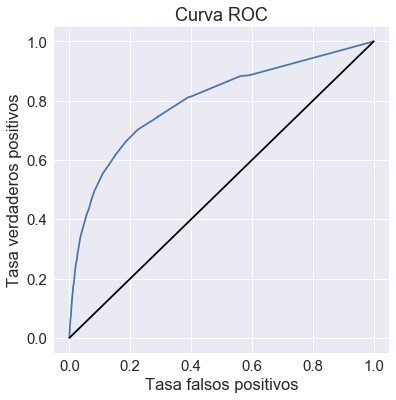

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

rmfc = RandomForestClassifier(n_estimators=50, max_features = 'sqrt')

pipe = Pipeline([
    ('imp',Imputer()),
    ('std',StandardScaler()),
    ('for', rmfc)
])
eval_model(pipe, X_train, Y_train, X_dev, Y_dev)

### 1.1 Grid Search para el Random Forest

In [34]:
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([
    ('imp',Imputer()),
    ('std',StandardScaler()),
    ('for',RandomForestClassifier())
])

param_range = [30, 40, 50, 60]

param_grid = {'for__n_estimators': param_range}

param_grid = [{'for__n_estimators': param_range,'for__max_features': ['auto']},
              {'for__n_estimators': param_range,'for__max_features': ['sqrt']}]

gs = GridSearchCV(estimator=pipe,
                  param_grid=param_grid,
                  scoring='accuracy')

gs = gs.fit(X_train, Y_train)
print(gs.best_score_)
print(gs.best_params_)

0.933490196078
{'for__max_features': 'sqrt', 'for__n_estimators': 50}


## 2. Naive Bayes


Evaluación en el conjunto de entrenamiento:
             precision    recall  f1-score   support

          0       0.96      0.02      0.03    118937
          1       0.07      0.99      0.13      8563

avg / total       0.90      0.08      0.04    127500

Roc_auc_score: 0.808492577193

Evaluación en el conjunto de validación:
             precision    recall  f1-score   support

          0       0.95      0.02      0.03     21037
          1       0.07      0.99      0.12      1463

avg / total       0.89      0.08      0.04     22500

Roc_auc_score: 0.800716431301


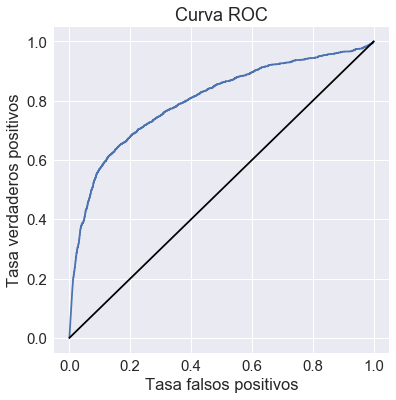

In [36]:
from sklearn.naive_bayes import GaussianNB

gnv = GaussianNB()
pipe = Pipeline([
    ('imp',Imputer()),
    ('std',StandardScaler()),
    ('nb',gnv)
])

eval_model(pipe, X_train, Y_train, X_dev, Y_dev)

## 3. kNN


Evaluación en el conjunto de entrenamiento:
             precision    recall  f1-score   support

          0       0.95      0.99      0.97    118937
          1       0.69      0.29      0.41      8563

avg / total       0.93      0.94      0.93    127500

Roc_auc_score: 0.948001424813

Evaluación en el conjunto de validación:
             precision    recall  f1-score   support

          0       0.95      0.98      0.96     21037
          1       0.43      0.18      0.25      1463

avg / total       0.91      0.93      0.92     22500

Roc_auc_score: 0.719798151426


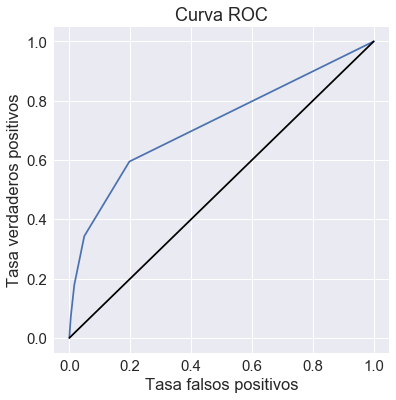

In [37]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

pipe = Pipeline([
    ('imp',Imputer()),
    ('std',StandardScaler()),
    ('knn', knn)
])
eval_model(pipe, X_train, Y_train, X_dev, Y_dev)

## 4. SVC

In [ ]:
from sklearn.svm import SVC

pipe = Pipeline([
    ('imp',Imputer()),
    ('std',StandardScaler()),
    ('svc',SVC(C = 0.5))
])
eval_model(pipe, X_train, Y_train, X_dev, Y_dev)

## 5. Gradient Boosting Regression


Evaluación en el conjunto de entrenamiento:
             precision    recall  f1-score   support

          0       0.94      0.99      0.97    118937
          1       0.62      0.19      0.29      8563

avg / total       0.92      0.94      0.92    127500

Roc_auc_score: 0.847423298203

Evaluación en el conjunto de validación:
             precision    recall  f1-score   support

          0       0.95      0.99      0.97     21037
          1       0.58      0.18      0.27      1463

avg / total       0.92      0.94      0.92     22500

Roc_auc_score: 0.838091178804


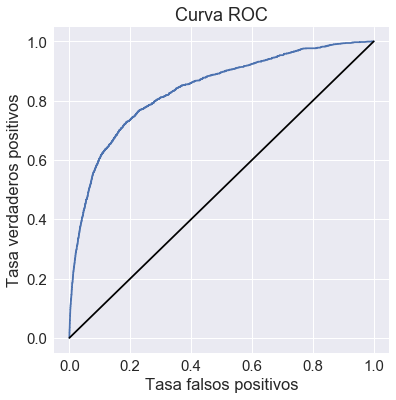

In [38]:
from sklearn.ensemble import GradientBoostingClassifier

gbMod = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=200, subsample=1.0,
                                   min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3,
                                   init=None, random_state=None, max_features=None, verbose=0)

pipe = Pipeline([
    ('imp',Imputer()),
    ('std',StandardScaler()),
    ('gbMod', gbMod)
])
eval_model(pipe, X_train, Y_train, X_dev, Y_dev)

In [64]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_dev, estimator.predict(X_dev))
print("MSE: %.4f" % mse)
plot_roc(X_dev, )

MSE: 0.0510


## 6. AdaBoostRegressor


Evaluación en el conjunto de entrenamiento:
             precision    recall  f1-score   support

          0       0.94      0.99      0.97    118937
          1       0.55      0.18      0.27      8563

avg / total       0.92      0.94      0.92    127500

Roc_auc_score: 0.839163952336

Evaluación en el conjunto de validación:
             precision    recall  f1-score   support

          0       0.95      0.99      0.97     21037
          1       0.56      0.19      0.28      1463

avg / total       0.92      0.94      0.92     22500

Roc_auc_score: 0.829209746678


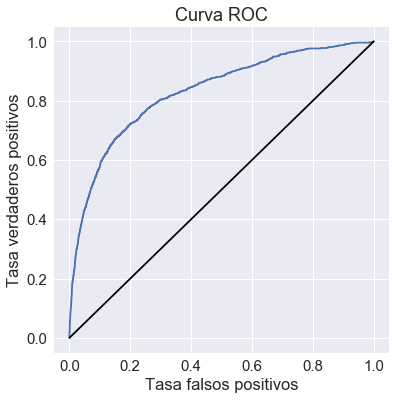

In [39]:
from sklearn.ensemble import AdaBoostClassifier

adaMod = AdaBoostClassifier(base_estimator=None, n_estimators=200, learning_rate=1.0)

pipe = Pipeline([
    ('imp',Imputer()),
    ('std',StandardScaler()),
    ('adaMod', adaMod)
])
eval_model(pipe, X_train, Y_train, X_dev, Y_dev)

# Cross-Validation

In [41]:
def cvDictGen(functions, scr, X_train=X_train, y_train=Y_train, cv=3, verbose=1):
    cvDict = {}
    for func in functions:
        cvScore = cross_val_score(func, X_train, y_train, cv=cv, verbose=verbose, scoring=scr)
        cvDict[str(func).split('(')[0]] = [cvScore.mean(), cvScore.std()]
    
    return cvDict

In [43]:
from sklearn.model_selection import cross_val_score
cvDictGen(functions=[rmfc, gnv, knn, gbMod, adaMod], scr='roc_auc')

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   23.5s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.8s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   37.4s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   38.9s finished


{'AdaBoostClassifier': [0.83567726593129033, 0.0012007193524762299],
 'GaussianNB': [0.80231433937649221, 0.0027388114781396766],
 'GradientBoostingClassifier': [0.84120581413442796, 0.0012097517055606384],
 'KNeighborsClassifier': [0.56203633820432264, 0.0028888010566627065],
 'RandomForestClassifier': [0.7978463408467501, 0.00066136745659167273]}

# Grid Search